# Libraries

In [1]:
import time
from itertools import cycle
# dataframes
import pandas as pd
import numpy as np
# Scikit
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import label_binarize
# Metrics
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, plot_roc_curve,roc_auc_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report
# Plot libraries
import matplotlib.pyplot as plt
from venn import venn
import seaborn as sns
# session
from sinfo import sinfo

# Functions

In [2]:
def preprocessing(dfTypeR): 
    print("preprocessing")
    dic = {}
    # for loop to go through the rows in the pandas table.
    # It is a preprocessing step.
    for row in dfTypeR.values:
        newRow = []
        # fromp and top are the source and target protein respectively.
        fromp = row[0].split(".")[1]
        top = row[1].split(".")[1]
        # concatenate them into a variable inter.
        inter = fromp+"-"+top
        # same thing for the type of link and their action (if no action the value is "").
        typeR = row[2]+"-"+str(row[3])
        # initialization of keys in <dic>.
        if(inter not in dic):
            dic[inter] = {}
        if(typeR not in dic[inter]):
            dic[inter][typeR] = []
        newRow = []
        # the columns 4 and 5 determine if the relation is directed or not, 
        # in that case, we change the value instead.
        if(row[4] == 'f'):
            newRow.append("Undirected")
            newRow.append(row[6])
            newRow.append(0)
        else:
            if(row[5] =='t'):
                newRow.append("Directed")
                newRow.append(row[6])
                newRow.append(0)
            else:
                newRow.append("Directed")
                newRow.append(row[6])
                newRow.append(1)
        dic[inter][typeR].append(newRow)

    newAr = []
    # We run the dic in a for loop to apply some criterias:
    # 1. if we have directed in both side, we add a new undirected link.
    # 2. the links with actions (except activation or inhibition) we kept.
    # 3. creation of an array to create the new table.
    for k1 in dic:
        vecType = []
        arrP = k1.split("-")
        for k2 in dic[k1]:
            vecType.append(k2)
            countD = 0
            score =0
            for x in dic[k1][k2]:
                if x[0] == "Directed":
                    countD=countD+1
                score = score + x[1]    
            if countD ==2:
                newRows = [["Undirected", int(score/len(dic[k1][k2])),0],
                            ["Directed", int(score/len(dic[k1][k2])),0],
                            ["Directed", int(score/len(dic[k1][k2])),1]]
                dic[k1][k2] = newRows 
            ele = k2
            arrT = k2.split("-")
            if arrT[1] =="" or arrT[1] =="nan" or arrT[0] == "activation" or arrT[0] == "inhibition":
                ele=arrT[0]


            for r in dic[k1][k2]:
                    if(r[2]==1):
                        newAr.append([arrP[1],arrP[0],ele,
                             r[0],r[1]])
                    else:
                        newAr.append([arrP[0],arrP[1],ele,
                             r[0],r[1]])
                        newAr.append([arrP[1],arrP[0],ele,
                             r[0],r[1]])
    print("exporting")
    # transform the array in pandas obj.
    dfTypeR_pre = pd.DataFrame(np.array(newAr), 
                               columns=["Source","Target","Link","Type","Score"])
    print("Done.")
    return(dfTypeR_pre)

In [3]:
def preprocessingV2(dfTypeR): 
    print("preprocessing")
    dic = {}
    # for loop to go through the rows in the pandas table.
    # It is a preprocessing step.
    for row in dfTypeR.values:
        newRow = []
        # fromp and top are the source and target protein respectively.
        fromp = row[0]
        top = row[1]
        # concatenate them into a variable inter.
        inter = fromp+"-"+top
        # same thing for the type of link and their action (if no action the value is "").
        typeR = row[2]+"-"+str(row[3])
        # initialization of keys in <dic>.
        if(inter not in dic):
            dic[inter] = {}
        if(typeR not in dic[inter]):
            dic[inter][typeR] = []
        newRow = []
        # the columns 4 and 5 determine if the relation is directed or not, 
        # in that case, we change the value instead.
        if(row[4] == 'f'):
            newRow.append("Undirected")
            newRow.append(row[6])
            newRow.append(0)
        else:
            if(row[5] =='t'):
                newRow.append("Directed")
                newRow.append(row[6])
                newRow.append(0)
            else:
                newRow.append("Directed")
                newRow.append(row[6])
                newRow.append(1)
        dic[inter][typeR].append(newRow)

    newAr = []
    # We run the dic in a for loop to apply some criterias:
    # 1. if we have directed in both side, we add a new undirected link.
    # 2. the links with actions (except activation or inhibition) we kept.
    # 3. creation of an array to create the new table.
    for k1 in dic:
        vecType = []
        arrP = k1.split("-")
        for k2 in dic[k1]:
            vecType.append(k2)
            countD = 0
            score =0
            for x in dic[k1][k2]:
                if x[0] == "Directed":
                    countD=countD+1
                score = score + x[1]    
            if countD ==2:
                newRows = [["Undirected", int(score/len(dic[k1][k2])),0],
                            ["Directed", int(score/len(dic[k1][k2])),0],
                            ["Directed", int(score/len(dic[k1][k2])),1]]
                dic[k1][k2] = newRows 
            ele = k2
            arrT = k2.split("-")
            if arrT[1] =="" or arrT[1] =="NA" or arrT[0] == "activation" or arrT[0] == "inhibition":
                ele=arrT[0]


            for r in dic[k1][k2]:
                    if(r[2]==1):
                        newAr.append([arrP[1],arrP[0],ele,
                             r[0],r[1]])
                    else:
                        newAr.append([arrP[0],arrP[1],ele,
                             r[0],r[1]])
                        newAr.append([arrP[1],arrP[0],ele,
                             r[0],r[1]])
    print("exporting")
    # transform the array in pandas obj.
    dfTypeR_pre = pd.DataFrame(np.array(newAr), 
                               columns=["Source","Target","Link","Type","Score"])
    print("Done.")
    return(dfTypeR_pre)

In [4]:
##### print("Creating function to split the different link in binary labels")
def transformBinaryLinkTable(tolabelize, df_back,col_pos='Link'):
    df = df_back.copy()
    dic = {}
    for x in df[col_pos].value_counts().index.values:
        if x != tolabelize:
            dic[x] = 0
        else:
            dic[x] = 1
    df[col_pos] = df[col_pos].map(dic)
    df = df.drop_duplicates()
    df['iteraction'] = df.loc[:,'Source'].str.cat(df.loc[:,'Target'],sep="-")
    arr = []
    zero = df.loc[df[col_pos] == 0]
    ones = df.loc[df[col_pos] == 1]
    inter0 = zero['iteraction']
    index0 = inter0.index
    inter1 = ones['iteraction'].to_numpy()
    for idx, interaction in np.ndenumerate(inter0):
        if(interaction in inter1):
            arr.append(index0[idx[0]])

    df = df.drop(arr)
    df = df.loc[:,df.columns != 'iteraction']
    return(df)

# *Arabidopsis thaliana* analysis

In [5]:
org = "athal"
# Reading the preprocess link data.
dfTypeR = pd.read_csv(org+".protein.actions.v11.0.txt.gz",
                      sep="\t",
                      compression="gzip",
                      keep_default_na=True)

# Reading the Seidr file converted in tsv.
dfSf    = pd.read_csv(org+"-network.txt",
                      sep='[;\t]',
                      engine='python',
                      keep_default_na=False,
                      na_values='nan')

In [6]:
# Automatic selection of the colons from Seidr.
selected_col = []
for c in dfSf.columns:
    if "Source" in c or "Target" in c  or "Type" in c or "score" in c  and ("D" not in c and "SDev" not in c):
        selected_col.append(c)
dfSf = dfSf[selected_col]

In [7]:
print("-----------string-action file-----------")
dfTypeR.head()

-----------string-action file-----------


item_id_a         item_id_b       mode action is_directional  \
0  3702.AT1G01010.1  3702.AT1G01020.1    binding    NaN              f   
1  3702.AT1G01020.1  3702.AT1G01010.1    binding    NaN              f   
2  3702.AT1G01040.2  3702.AT1G01760.1    binding    NaN              f   
3  3702.AT1G01040.2  3702.AT1G07210.1    binding    NaN              f   
4  3702.AT1G01040.2  3702.AT1G07210.1  catalysis    NaN              t   

  a_is_acting  score  
0           f    401  
1           f    401  
2           f    353  
3           f    343  
4           f    343

In [8]:
print("-----------seidr file-----------")
dfSf.head()

-----------seidr file-----------


Source     Target        Type  ARACNE_score  CLR_score  ELNET_score  \
0  AT1G01225  AT1G01130  Undirected           NaN    2.51912        0.228   
1  AT1G01380  AT1G01070    Directed           NaN    1.59224        0.283   
2  AT1G01400  AT1G01280  Undirected           NaN    6.35602        0.484   
3  AT1G01410  AT1G01280    Directed           NaN    4.67606        0.033   
4  AT1G01410  AT1G01400    Directed           NaN    5.28858        0.223   

   GENIE3_score  LLR_score  MI_score  NARROMI_score  PCOR_score  \
0      0.639124      0.217  0.347712       0.066518    0.001027   
1      0.104246      0.535  0.306454       0.112213    0.003267   
2      5.355960      0.484  0.333096       0.422627    0.002973   
3      2.155230      0.480  0.306471            NaN    0.002262   
4      1.363310      0.474  0.307502       0.180840    0.002149   

   PEARSON_score  TOM_score  PLSNET_score  SPEARMAN_score  TIGRESS_score  \
0       0.489676   0.022844      0.002596        0.384108        0.00935   
1       0.383988   0.013383      0.008244        0.380991        0.00250   
2       0.929882   0.327482      0.024297        0.730307        0.00190   
3       0.740514   0.227330      0.015419        0.716679            NaN   
4       0.768711   0.207635      0.009831        0.883156        0.00120   

   irp_score  
0   0.267943  
1   0.315015  
2   0.499897  
3   0.307832  
4   0.394951

preprocessing
exporting
Done.


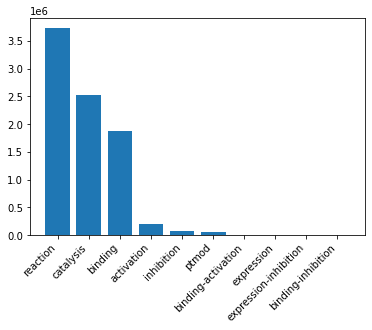

            Source     Target     Link        Type Score
0        AT1G01010  AT1G01020  binding  Undirected   401
1        AT1G01020  AT1G01010  binding  Undirected   401
2        AT1G01020  AT1G01010  binding  Undirected   401
3        AT1G01010  AT1G01020  binding  Undirected   401
4        AT1G01040  AT1G01760  binding  Undirected   353
...            ...        ...      ...         ...   ...
8454543  ATMG00520  ATMG01360  binding  Undirected   607
8454544  ATMG01360  ATMG00730  binding  Undirected   979
8454545  ATMG00730  ATMG01360  binding  Undirected   979
8454546  ATMG01360  ATMG01280  binding  Undirected   704
8454547  ATMG01280  ATMG01360  binding  Undirected   704

[8454548 rows x 5 columns]


In [9]:
dfTypeR_pre = preprocessing(dfTypeR)
link_count = dfTypeR_pre['Link'].value_counts()
indexNamesArr = link_count.index.values
fig, ax = plt.subplots()
plt.bar(indexNamesArr, link_count)
plt.xticks(rotation = 45, ha="right")
plt.show()
print(dfTypeR_pre)

In [10]:
to_despreciate = ("ptmod","expression")
dfTypeR_pre = dfTypeR_pre[~dfTypeR_pre['Link'].isin(to_despreciate)]
dfTypeR_pre['Link'] = dfTypeR_pre['Link'].replace(['activation',
                                                   "inhibition",
                                                   "expression-inhibition"],
                                                   'regulation').replace(['binding-activation',
                                                                          'binding-inhibition'],
                                                                          'binding')

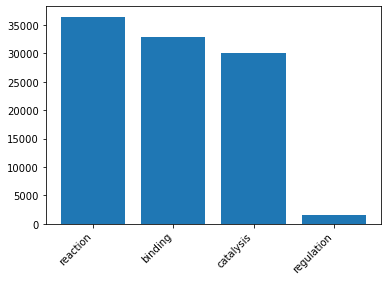

In [11]:
# Combine the pandas obj by the columns Source, Target and Type.
result = pd.merge( dfTypeR_pre,dfSf,
                  on=["Source","Target","Type"],
                  how="inner")
# Remove the row duplicates.
result['Type'] = result["Type"].map({"Directed":1,"Undirected":0})
result = result.drop_duplicates()
link_count = result['Link'].value_counts()
indexNamesArr = link_count.index.values
fig, ax = plt.subplots()
plt.bar(indexNamesArr, link_count)
plt.xticks(rotation = 45, ha="right")
plt.show()

In [12]:
binaryTables = {}
for x in result['Link'].value_counts().index.values:
    print(x)
    binaryTables[x] = transformBinaryLinkTable(x,result)

reaction
binding
catalysis
regulation


<AxesSubplot:>

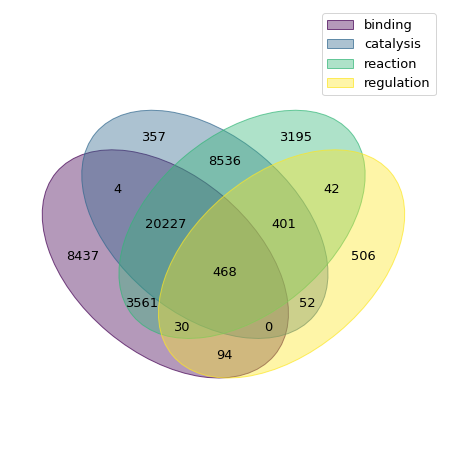

In [13]:
interaction= result['Source'].str.cat(result['Target'],sep="-")
ij=pd.DataFrame([interaction, result["Link"]]).T.drop_duplicates()
res = ij.groupby('Link')["Source"].apply(' '.join).reset_index()
dict1 = dict()
for row in res.iterrows():
    dict1[res.Link[row[0]]] = set(res.Source[row[0]].split())
venn(dict1)

## NAs evaluation

In [14]:
print(result.count())

Source            100939
Target            100939
Link              100939
Type              100939
Score             100939
ARACNE_score        2421
CLR_score         100933
ELNET_score        87459
GENIE3_score      100939
LLR_score         100917
MI_score          100939
NARROMI_score      34472
PCOR_score        100939
PEARSON_score     100939
TOM_score         100939
PLSNET_score      100936
SPEARMAN_score    100939
TIGRESS_score      26333
irp_score         100939
dtype: int64


In [15]:
del result["ARACNE_score"]
del result["NARROMI_score"]
del result["TIGRESS_score"]

In [16]:
X = result.iloc[:,3:]
y = result['Link']
imputer = KNNImputer(n_neighbors=7, weights="uniform")
X_imputed=imputer.fit_transform(X)

In [17]:
X_imputed_abs = pd.DataFrame(X_imputed).abs()
X_imputed_abs.columns = X.columns
print(X_imputed_abs.count())

Type              100939
Score             100939
CLR_score         100939
ELNET_score       100939
GENIE3_score      100939
LLR_score         100939
MI_score          100939
PCOR_score        100939
PEARSON_score     100939
TOM_score         100939
PLSNET_score      100939
SPEARMAN_score    100939
irp_score         100939
dtype: int64


## MinMax scaler

In [18]:
scaler = MinMaxScaler()
X_ia_scaled = scaler.fit(X_imputed_abs).transform(X_imputed_abs)
X_ia_scaled = pd.DataFrame(X_ia_scaled)
X_ia_scaled.columns = X_imputed_abs.columns
print(X_ia_scaled)

        Type     Score  CLR_score  ELNET_score  GENIE3_score  LLR_score  \
0        0.0  0.475854   0.225545     0.025045      0.100318   0.902135   
1        0.0  0.598351   0.126708     0.633274      0.035798   0.435943   
2        0.0  0.610130   0.107053     0.692308      0.039033   0.854093   
3        0.0  0.588928   0.123627     0.898032      0.013053   0.870107   
4        0.0  0.610130   0.167283     0.853309      0.009572   0.907473   
...      ...       ...        ...          ...           ...        ...   
100934   1.0  0.243816   0.718279     0.926655      0.470846   0.895018   
100935   0.0  0.778563   0.349276     0.055456      0.187890   0.909253   
100936   0.0  0.537102   0.349276     0.055456      0.187890   0.909253   
100937   0.0  0.537102   0.349276     0.055456      0.187890   0.909253   
100938   1.0  0.243816   0.569066     0.860465      0.425275   0.891459   

        MI_score  PCOR_score  PEARSON_score  TOM_score  PLSNET_score  \
0       0.197339    0.03542

## PCA

In [19]:
X = X_ia_scaled
tn = ['binding','catalysis' ,'reaction', 'regulation']
y = result['Link'].reset_index(drop=True)

### Cumulative explained variance

Text(0, 0.5, 'cumulative explained variance')

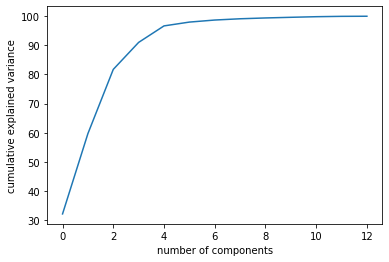

In [20]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Plot PCAs

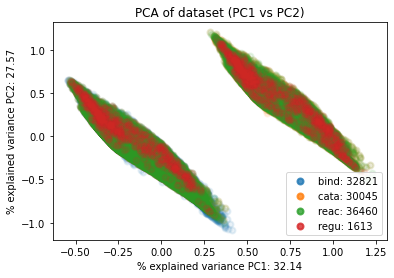

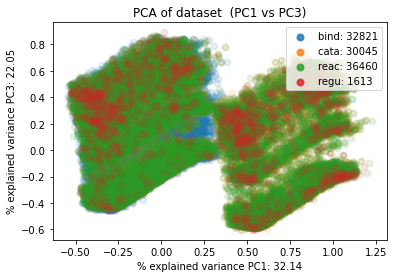

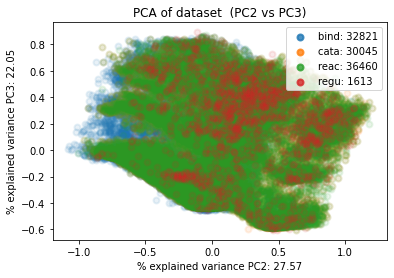

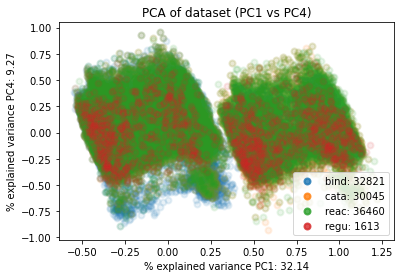

In [21]:
pca = PCA(n_components=4, random_state=42)
X_r = pca.fit_transform(X)
plt.figure()
colors = sns.color_palette()
lw = 2
plt.title('PCA of dataset (PC1 vs PC2)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC1: "+str(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("% explained variance PC2: "+str(round(pca.explained_variance_ratio_[1]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

plt.title('PCA of dataset  (PC1 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC1: "+str(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("% explained variance PC3: "+str(round(pca.explained_variance_ratio_[2]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

plt.title('PCA of dataset  (PC2 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 1], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC2: "+str(round(pca.explained_variance_ratio_[1]*100,2)))
plt.ylabel("% explained variance PC3: "+str(round(pca.explained_variance_ratio_[2]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

plt.title('PCA of dataset (PC1 vs PC4)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 3], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC1: "+str(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("% explained variance PC4: "+str(round(pca.explained_variance_ratio_[3]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

### Feature importances

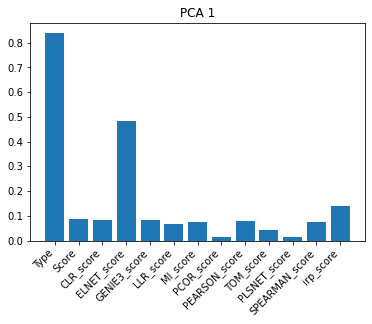

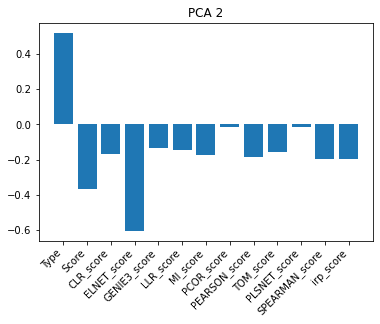

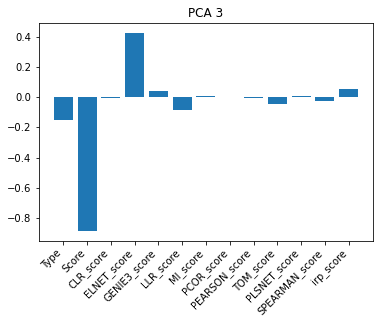

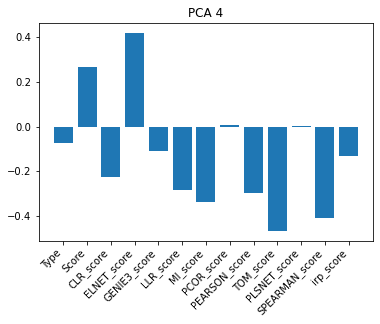

In [22]:
i = 1
for com in pca.components_:
    plt.bar(X.columns,com)
    plt.title("PCA " + str(i)) 
    plt.xticks(rotation = 45, ha="right")
    plt.show()
    i+=1

## TSNE 

In [23]:
tsne= TSNE(n_components=3,init='pca',
                         random_state=42,
                         n_iter = 500 )
X_r = tsne.fit_transform(X)

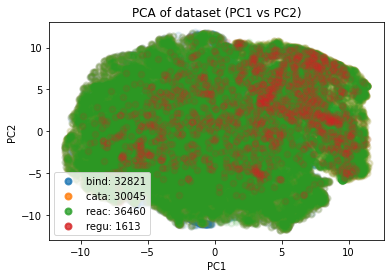

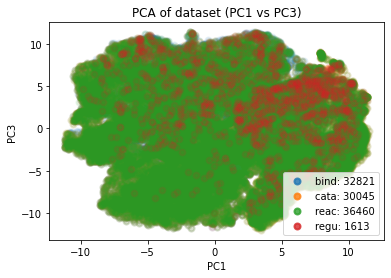

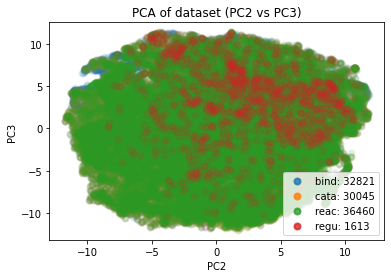

In [24]:
plt.figure()
colors = sns.color_palette()
lw = 2
plt.title('PCA of dataset (PC1 vs PC2)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("PC1")
plt.ylabel("PC2")
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()
plt.title('PCA of dataset (PC1 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("PC1")
plt.ylabel("PC3")
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()
plt.title('PCA of dataset (PC2 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 1], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("PC2")
plt.ylabel("PC3")
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

## Export

In [25]:
pd.concat([y, X_ia_scaled], axis=1).to_csv("results/"+org+".processed_data.tsv",
                               sep='\t',
                               index=False)

# Populus tremula analysis

In [26]:
org = "potra"
# Reading the preprocess link data.
dfTypeR = pd.read_csv(org+".protein.actions.v11.0.txt.gz",
                      sep="\t",
                      compression="gzip",
                      keep_default_na=False,
                      na_values='')
# Reading the Seidr file converted in tsv.
dfSf    = pd.read_csv(org+"-network.txt",
                      sep='[;\t]',
                      engine='python',
                      keep_default_na=False,
                      na_values='nan')

In [27]:
# Automatic selection of the colons from Seidr.
selected_col = []
for c in dfSf.columns:
    if "Source" in c or "Target" in c  or "Type" in c or "score" in c  and ("D" not in c and "SDev" not in c):
        selected_col.append(c)
dfSf = dfSf[selected_col]

In [28]:
print("-----------string-action file-----------")
dfTypeR.head()

-----------string-action file-----------


item_id_a        item_id_b     mode action  is_directional  \
0  Potra2n763s36707  Potra2n16c30428  binding     NA           False   
1  Potra2n763s36707   Potra2n5c12706  binding     NA           False   
2     Potra2n1c1035  Potra2n15c28871  binding     NA           False   
3     Potra2n1c1035  Potra2n15c28873  binding     NA           False   
4     Potra2n1c1035    Potra2n1c1053  binding     NA           False   

   a_is_acting  score  
0        False    154  
1        False    154  
2        False    769  
3        False    769  
4        False    400

In [29]:
print("-----------seidr file-----------")
dfSf.head()

-----------seidr file-----------


Source            Target        Type  ARACNE_score  TOM_score  \
0  Potra2c131s34686  Potra2c131s34676  Undirected           NaN   0.134824   
1  Potra2c131s34686  Potra2c131s34677  Undirected           NaN   0.145822   
2  Potra2c131s34686  Potra2c131s34685    Directed           NaN   0.119777   
3  Potra2c131s34687  Potra2c131s34685  Undirected           NaN   0.094158   
4  Potra2c131s34689  Potra2c131s34685  Undirected           NaN   0.085549   

   CLR_score  ELNET_score  GENIE3_score  LLR_score  MI_score  NARROMI_score  \
0    2.67254        0.182      0.447450      0.316  0.195828      -0.049909   
1    3.39321        0.301      1.201300      0.156  0.278235       0.064569   
2    2.03467        0.214      0.754684      0.478  0.298301      -0.074566   
3    2.75835        0.478      1.928360      0.496  0.309110       0.082066   
4    2.24622        0.014      0.984184      0.457  0.135046       0.037724   

   PCOR_score  PEARSON_score  PLSNET_score  SPEARMAN_score  TIGRESS_score  \
0    0.003118       0.469940      0.014449        0.396286        0.04980   
1    0.002338       0.525276      0.029884        0.506070        0.06755   
2    0.005393       0.557868      0.059010        0.466023            NaN   
3    0.005953       0.580146      0.072322        0.328183        0.00045   
4    0.004755       0.414607      0.079497        0.141776            NaN   

   irp_score  
0   0.254119  
1   0.311845  
2   0.258337  
3   0.354797  
4   0.249125

preprocessing
exporting
Done.


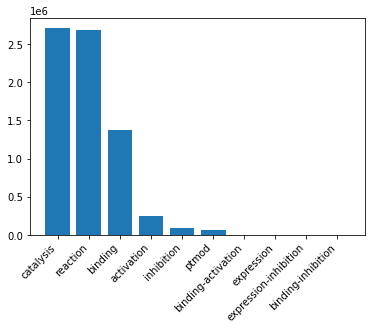

In [30]:
dfTypeR_pre = preprocessingV2(dfTypeR)
link_count = dfTypeR_pre['Link'].value_counts()
indexNamesArr = link_count.index.values
fig, ax = plt.subplots()
plt.bar(indexNamesArr, link_count)
plt.xticks(rotation = 45, ha="right")
plt.show()

In [31]:
to_despreciate = ("ptmod","expression")
dfTypeR_pre = dfTypeR_pre[~dfTypeR_pre['Link'].isin(to_despreciate)]
dfTypeR_pre['Link'] = dfTypeR_pre['Link'].replace(['activation',
                                                   "inhibition",
                                                   "expression-inhibition"],
                                                   'regulation').replace(['binding-activation',
                                                                          'binding-inhibition'],
                                                                          'binding')

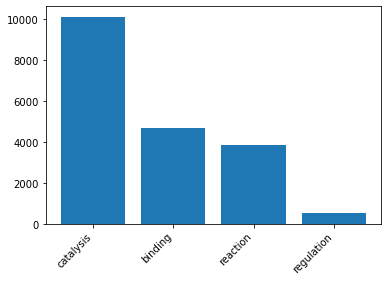

In [32]:
# Combine the pandas obj by the columns Source, Target and Type.
result = pd.merge( dfTypeR_pre,dfSf,
                  on=["Source","Target","Type"],
                  how="inner")
# Remove the row duplicates.
result['Type'] = result["Type"].map({"Directed":1,"Undirected":0})
result = result.drop_duplicates()
link_count = result['Link'].value_counts()
indexNamesArr = link_count.index.values
fig, ax = plt.subplots()
plt.bar(indexNamesArr, link_count)
plt.xticks(rotation = 45, ha="right")
plt.show()

In [33]:
binaryTables = {}
for x in result['Link'].value_counts().index.values:
    print(x)
    binaryTables[x] = transformBinaryLinkTable(x,result)

catalysis
binding
reaction
regulation


<AxesSubplot:>

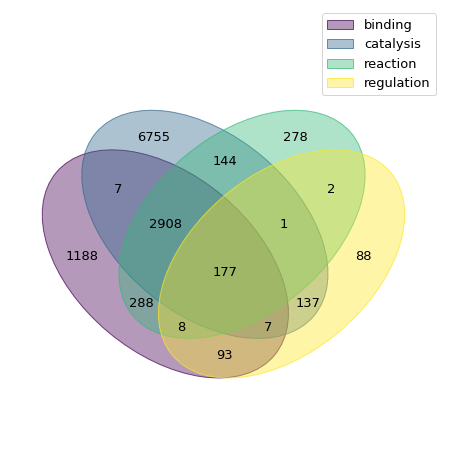

In [34]:
interaction= result['Source'].str.cat(result['Target'],sep="-")
ij=pd.DataFrame([interaction, result["Link"]]).T.drop_duplicates()
res = ij.groupby('Link')["Source"].apply(' '.join).reset_index()
dict1 = dict()
for row in res.iterrows():
    dict1[res.Link[row[0]]] = set(res.Source[row[0]].split())
venn(dict1)

## NAs evaluation

In [35]:
print(result.count())

Source            19173
Target            19173
Link              19173
Type              19173
Score             19173
ARACNE_score        515
TOM_score         19173
CLR_score         19167
ELNET_score       19157
GENIE3_score      19173
LLR_score         19091
MI_score          19173
NARROMI_score     11975
PCOR_score        19173
PEARSON_score     19173
PLSNET_score      19173
SPEARMAN_score    19173
TIGRESS_score     12116
irp_score         19173
dtype: int64


In [36]:
del result["ARACNE_score"]

In [37]:
X = result.iloc[:,3:]
y = result['Link']
imputer = KNNImputer(n_neighbors=7, weights="uniform")
X_imputed=imputer.fit_transform(X)

In [38]:
X_imputed_abs = pd.DataFrame(X_imputed).abs()
X_imputed_abs.columns = X.columns
print(X_imputed_abs.count())

Type              19173
Score             19173
TOM_score         19173
CLR_score         19173
ELNET_score       19173
GENIE3_score      19173
LLR_score         19173
MI_score          19173
NARROMI_score     19173
PCOR_score        19173
PEARSON_score     19173
PLSNET_score      19173
SPEARMAN_score    19173
TIGRESS_score     19173
irp_score         19173
dtype: int64


## MinMax scaler

In [39]:
scaler = MinMaxScaler()
X_ia_scaled = scaler.fit(X_imputed_abs).transform(X_imputed_abs)
X_ia_scaled = pd.DataFrame(X_ia_scaled)
X_ia_scaled.columns = X_imputed_abs.columns
print(X_ia_scaled)

       Type     Score  TOM_score  CLR_score  ELNET_score  GENIE3_score  \
0       0.0  0.550920   0.370687   0.630766     0.928187      0.339536   
1       1.0  0.887117   0.281385   0.420746     0.786355      0.154908   
2       1.0  0.482209   0.281385   0.420746     0.786355      0.154908   
3       1.0  0.482209   0.281385   0.420746     0.786355      0.154908   
4       1.0  0.482209   0.281385   0.420746     0.786355      0.154908   
...     ...       ...        ...        ...          ...           ...   
19168   1.0  0.611043   0.944016   0.454746     0.962298      0.408790   
19169   1.0  0.776687   0.944016   0.454746     0.962298      0.408790   
19170   1.0  0.776687   0.944016   0.454746     0.962298      0.408790   
19171   0.0  0.587730   0.965266   0.438148     0.834829      0.263687   
19172   0.0  0.587730   0.974376   0.538727     0.861759      0.401984   

       LLR_score  MI_score  NARROMI_score  PCOR_score  PEARSON_score  \
0       0.903052  0.446085       0.2298

## PCA

In [40]:
X = X_ia_scaled
tn = ['binding','catalysis' ,'reaction', 'regulation']
y = result['Link'].reset_index(drop=True)

### Cumulative explained variance

Text(0, 0.5, 'cumulative explained variance')

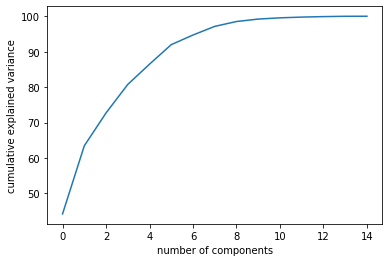

In [41]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Plot PCAs

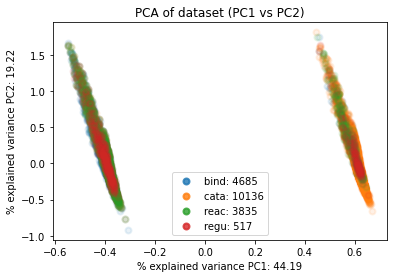

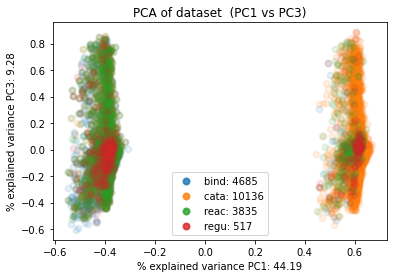

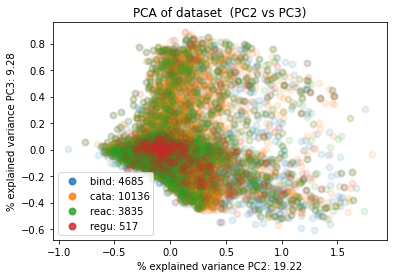

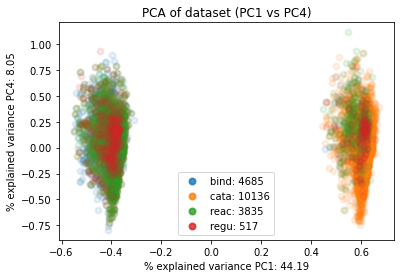

In [42]:
pca = PCA(n_components=4, random_state=42)
X_r = pca.fit_transform(X)
plt.figure()
colors = sns.color_palette()
lw = 2
plt.title('PCA of dataset (PC1 vs PC2)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC1: "+str(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("% explained variance PC2: "+str(round(pca.explained_variance_ratio_[1]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

plt.title('PCA of dataset  (PC1 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC1: "+str(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("% explained variance PC3: "+str(round(pca.explained_variance_ratio_[2]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

plt.title('PCA of dataset  (PC2 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 1], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC2: "+str(round(pca.explained_variance_ratio_[1]*100,2)))
plt.ylabel("% explained variance PC3: "+str(round(pca.explained_variance_ratio_[2]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

plt.title('PCA of dataset (PC1 vs PC4)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 3], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC1: "+str(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("% explained variance PC4: "+str(round(pca.explained_variance_ratio_[3]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

### Feature importances

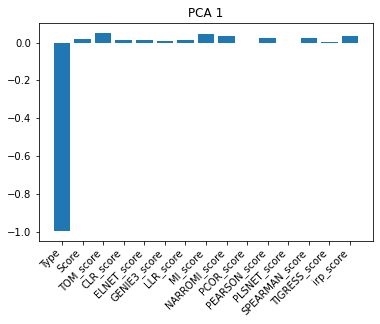

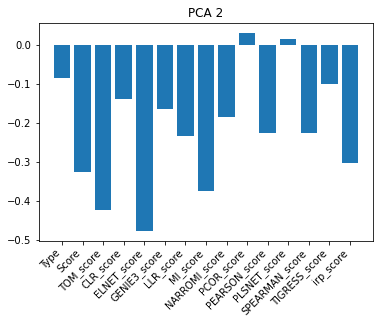

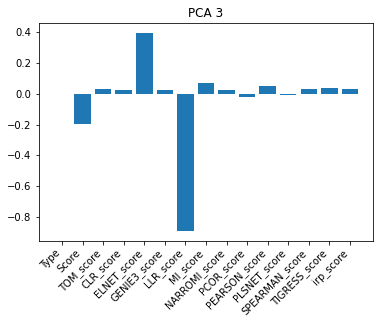

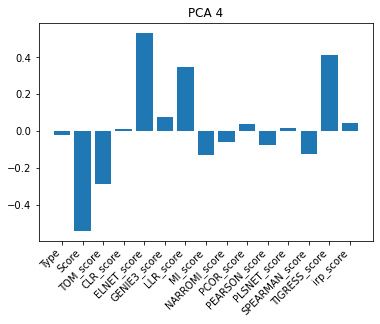

In [43]:
i = 1
for com in pca.components_:
    plt.bar(X.columns,com)
    plt.title("PCA " + str(i)) 
    plt.xticks(rotation = 45, ha="right")
    plt.show()
    i+=1

## TSNE 

In [44]:
tsne= TSNE(n_components=3,init='pca',
                         random_state=42,
                         n_iter = 500 )
X_r = tsne.fit_transform(X)

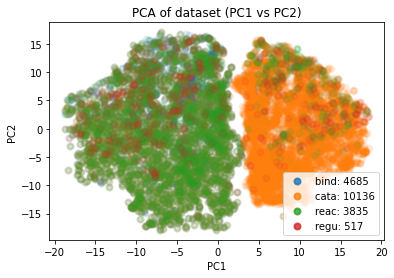

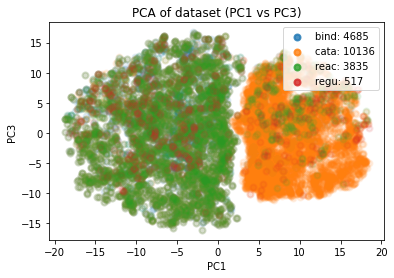

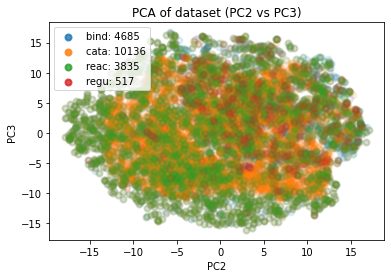

In [45]:
plt.figure()
colors = sns.color_palette()
lw = 2
plt.title('PCA of dataset (PC1 vs PC2)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("PC1")
plt.ylabel("PC2")
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()
plt.title('PCA of dataset (PC1 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("PC1")
plt.ylabel("PC3")
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()
plt.title('PCA of dataset (PC2 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 1], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("PC2")
plt.ylabel("PC3")
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

## Export

In [46]:
pd.concat([y, X_ia_scaled], axis=1).to_csv("results/"+org+".processed_data.tsv",
                               sep='\t',
                               index=False)

# *Eucaliptus grandis* analysis

In [47]:
org = "eugra"
# Reading the preprocess link data.
dfTypeR = pd.read_csv(org+"V2.protein.actions.v11.0.txt",
                      sep="\t",
                      keep_default_na=False,
                      na_values='')
# Reading the Seidr file converted in tsv.
dfSf    = pd.read_csv(org+"-network.txt",
                      sep='[;\t]',
                      engine='python',
                      keep_default_na=False,
                      na_values='nan')

In [48]:
# Automatic selection of the colons from Seidr.
selected_col = []
for c in dfSf.columns:
    if "Source" in c or "Target" in c  or "Type" in c or "score" in c  and ("D" not in c and "SDev" not in c):
        selected_col.append(c)
dfSf = dfSf[selected_col]

In [49]:
print("-----------string-action file-----------")
dfTypeR.head()

-----------string-action file-----------


item_id_a     item_id_b       mode action  is_directional  a_is_acting  \
0  Eucgr.H02311  Eucgr.A01152  catalysis     NA            True        False   
1  Eucgr.H02311  Eucgr.H01473  catalysis     NA            True         True   
2  Eucgr.H02311  Eucgr.A00913   reaction     NA            True         True   
3  Eucgr.H02311  Eucgr.B03575    binding     NA           False        False   
4  Eucgr.H02311  Eucgr.B03575  catalysis     NA            True        False   

   score  
0    260  
1    268  
2    625  
3    264  
4    254

In [50]:
print("-----------seidr file-----------")
dfSf.head()

-----------seidr file-----------


Source        Target        Type  ARACNE_score  CLR_score  \
0  Eucgr.A00081  Eucgr.A00054  Undirected           NaN    3.80515   
1  Eucgr.A00092  Eucgr.A00018  Undirected           NaN    5.53434   
2  Eucgr.A00189  Eucgr.A00039  Undirected           NaN    4.06924   
3  Eucgr.A00197  Eucgr.A00096  Undirected           NaN    5.10176   
4  Eucgr.A00240  Eucgr.A00038  Undirected           NaN    4.78214   

   ELNET_score  GENIE3_score  LLR_score  MI_score  NARROMI_score  PCOR_score  \
0          NaN      0.007638        NaN  0.308182       0.314152   -0.000073   
1          NaN      0.014977        NaN  0.235245       0.204778   -0.000020   
2          NaN      0.010511      0.449  0.184084       0.148266    0.000297   
3          NaN      0.017955      0.001  0.221552       0.220805   -0.000430   
4          NaN      0.044025      0.001  0.247125            NaN    0.000384   

   PEARSON_score  PLSNET_score  SPEARMAN_score  TIGRESS_score  irp_score  
0      -0.890007      0.007300       -0.847375        0.02450   0.266487  
1      -0.800503      0.096138       -0.807082        0.02995   0.266311  
2       0.723548      0.104756        0.551061        0.00670   0.259268  
3      -0.817597      0.232075       -0.722833        0.18875   0.320857  
4       0.826510      0.025068        0.838828        0.14025   0.259200

preprocessing
exporting
Done.


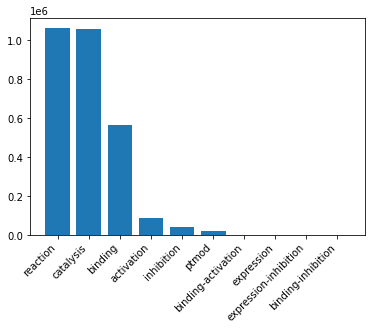

In [51]:
dfTypeR_pre = preprocessingV2(dfTypeR)
link_count = dfTypeR_pre['Link'].value_counts()
indexNamesArr = link_count.index.values
fig, ax = plt.subplots()
plt.bar(indexNamesArr, link_count)
plt.xticks(rotation = 45, ha="right")
plt.show()

In [52]:
to_despreciate = ("ptmod","expression")
dfTypeR_pre = dfTypeR_pre[~dfTypeR_pre['Link'].isin(to_despreciate)]
dfTypeR_pre['Link'] = dfTypeR_pre['Link'].replace(['activation',
                                                   "inhibition",
                                                   "expression-inhibition"],
                                                   'regulation').replace(['binding-activation',
                                                                          'binding-inhibition'],
                                                                          'binding')

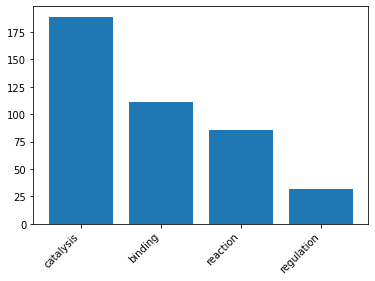

In [53]:
# Combine the pandas obj by the columns Source, Target and Type.
result = pd.merge( dfTypeR_pre,dfSf,
                  on=["Source","Target","Type"],
                  how="inner")
# Remove the row duplicates.
result['Type'] = result["Type"].map({"Directed":1,"Undirected":0})
result = result.drop_duplicates()
link_count = result['Link'].value_counts()
indexNamesArr = link_count.index.values
fig, ax = plt.subplots()
plt.bar(indexNamesArr, link_count)
plt.xticks(rotation = 45, ha="right")
plt.show()

In [54]:
binaryTables = {}
for x in result['Link'].value_counts().index.values:
    print(x)
    binaryTables[x] = transformBinaryLinkTable(x,result)

catalysis
binding
reaction
regulation


<AxesSubplot:>

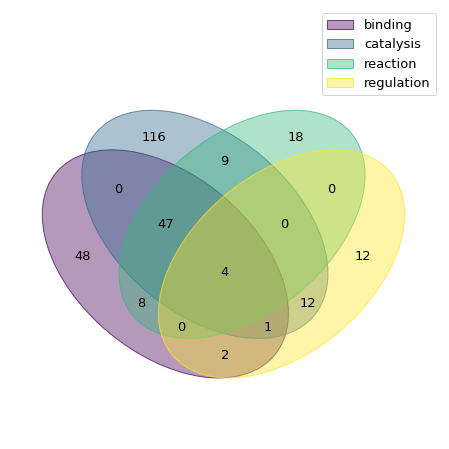

In [55]:
interaction= result['Source'].str.cat(result['Target'],sep="-")
ij=pd.DataFrame([interaction, result["Link"]]).T.drop_duplicates()
res = ij.groupby('Link')["Source"].apply(' '.join).reset_index()
dict1 = dict()
for row in res.iterrows():
    dict1[res.Link[row[0]]] = set(res.Source[row[0]].split())
venn(dict1)

## NAs evaluation

In [56]:
print(result.count())

Source            418
Target            418
Link              418
Type              418
Score             418
ARACNE_score       25
CLR_score         418
ELNET_score       166
GENIE3_score      406
LLR_score         125
MI_score          418
NARROMI_score     288
PCOR_score        418
PEARSON_score     418
PLSNET_score      418
SPEARMAN_score    418
TIGRESS_score     417
irp_score         418
dtype: int64


In [57]:
del result["ARACNE_score"]

In [58]:
X = result.iloc[:,3:]
y = result['Link']
imputer = KNNImputer(n_neighbors=7, weights="uniform")
X_imputed=imputer.fit_transform(X)

In [59]:
X_imputed_abs = pd.DataFrame(X_imputed).abs()
X_imputed_abs.columns = X.columns
print(X_imputed_abs.count())

Type              418
Score             418
CLR_score         418
ELNET_score       418
GENIE3_score      418
LLR_score         418
MI_score          418
NARROMI_score     418
PCOR_score        418
PEARSON_score     418
PLSNET_score      418
SPEARMAN_score    418
TIGRESS_score     418
irp_score         418
dtype: int64


## MinMax scaler

In [60]:
scaler = MinMaxScaler()
X_ia_scaled = scaler.fit(X_imputed_abs).transform(X_imputed_abs)
X_ia_scaled = pd.DataFrame(X_ia_scaled)
X_ia_scaled.columns = X_imputed_abs.columns
print(X_ia_scaled)

     Type     Score  CLR_score  ELNET_score  GENIE3_score  LLR_score  \
0     0.0  0.282367   0.447032     0.169592      0.002169   0.232426   
1     0.0  0.045623   0.196300     0.079395      0.048146   0.336168   
2     0.0  0.133169   0.354474     0.019444      0.460900   0.081066   
3     1.0  0.686806   0.372963     0.559546      0.032456   0.141723   
4     1.0  0.675709   0.372963     0.559546      0.032456   0.168651   
..    ...       ...        ...          ...           ...        ...   
413   1.0  0.616523   0.426321     0.661356      0.081493   0.184524   
414   1.0  0.685573   0.447088     0.419930      0.013688   0.157029   
415   1.0  0.030826   0.527551     0.223062      0.000096   0.156746   
416   0.0  0.002466   0.834629     0.003511      0.185017   0.676871   
417   1.0  0.924784   0.758550     0.784499      0.043015   0.121032   

     MI_score  NARROMI_score  PCOR_score  PEARSON_score  PLSNET_score  \
0    0.546079       0.405223    0.032253       0.761440      0

## PCA

In [61]:
X = X_ia_scaled
tn = ['binding','catalysis' ,'reaction', 'regulation']
y = result['Link'].reset_index(drop=True)

### Cumulative explained variance

Text(0, 0.5, 'cumulative explained variance')

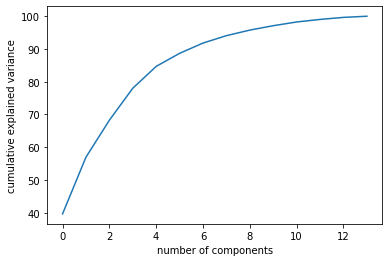

In [62]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Plot PCAs

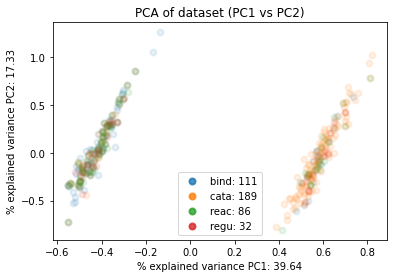

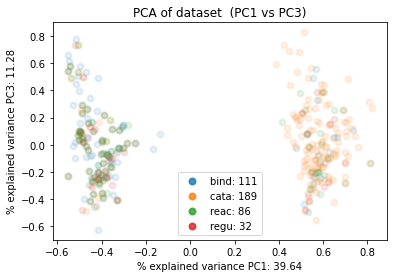

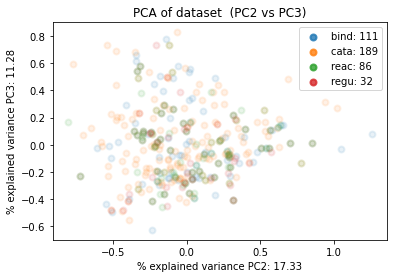

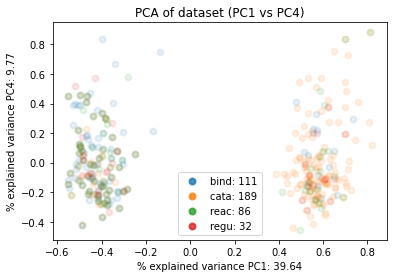

In [63]:
pca = PCA(n_components=4, random_state=42)
X_r = pca.fit_transform(X)
plt.figure()
colors = sns.color_palette()
lw = 2
plt.title('PCA of dataset (PC1 vs PC2)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC1: "+str(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("% explained variance PC2: "+str(round(pca.explained_variance_ratio_[1]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

plt.title('PCA of dataset  (PC1 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC1: "+str(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("% explained variance PC3: "+str(round(pca.explained_variance_ratio_[2]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

plt.title('PCA of dataset  (PC2 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 1], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC2: "+str(round(pca.explained_variance_ratio_[1]*100,2)))
plt.ylabel("% explained variance PC3: "+str(round(pca.explained_variance_ratio_[2]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

plt.title('PCA of dataset (PC1 vs PC4)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 3], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC1: "+str(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("% explained variance PC4: "+str(round(pca.explained_variance_ratio_[3]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

### Feature importances

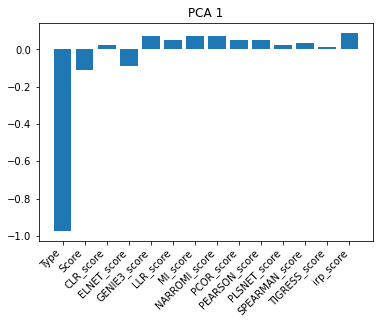

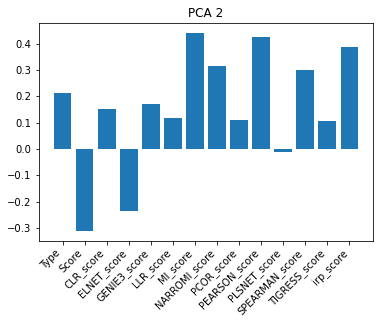

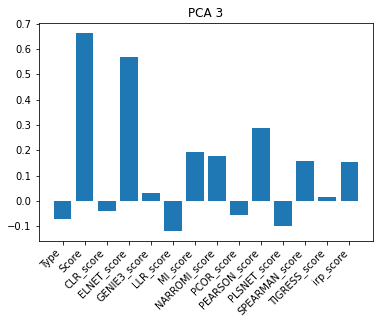

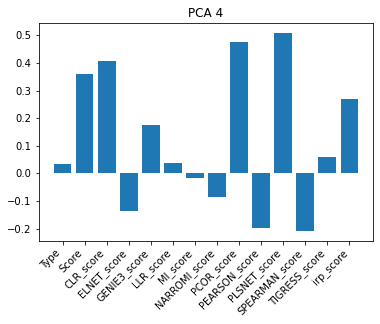

In [64]:
i = 1
for com in pca.components_:
    plt.bar(X.columns,com)
    plt.title("PCA " + str(i)) 
    plt.xticks(rotation = 45, ha="right")
    plt.show()
    i+=1

## TSNE 

In [65]:
tsne= TSNE(n_components=3,init='pca',
                         random_state=42,
                         n_iter = 500 )
X_r = tsne.fit_transform(X)

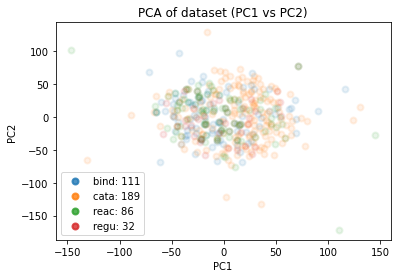

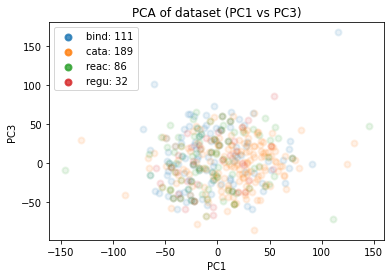

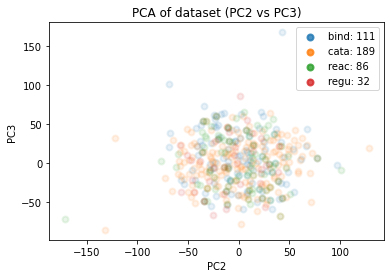

In [66]:
plt.figure()
colors = sns.color_palette()
lw = 2
plt.title('PCA of dataset (PC1 vs PC2)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("PC1")
plt.ylabel("PC2")
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()
plt.title('PCA of dataset (PC1 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("PC1")
plt.ylabel("PC3")
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()
plt.title('PCA of dataset (PC2 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 1], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("PC2")
plt.ylabel("PC3")
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

## Export

In [67]:
pd.concat([y, X_ia_scaled], axis=1).to_csv("results/"+org+".processed_data.tsv",
                               sep='\t',
                               index=False)

# *Drosophila melanogaster* analysis

In [68]:
org = "dmel"
# Reading the preprocess link data.
dfTypeR = pd.read_csv(org+".protein.actions.v11.0.txt",
                      sep="\t",
                      keep_default_na=False,
                      na_values='')
# Reading the Seidr file converted in tsv.
dfSf    = pd.read_csv(org+"-network.txt",
                      sep='[;\t]',
                      engine='python',
                      keep_default_na=False,
                      na_values='nan')

In [69]:
# Automatic selection of the colons from Seidr.
selected_col = []
for c in dfSf.columns:
    if "Source" in c or "Target" in c  or "Type" in c or "score" in c  and ("D" not in c and "SDev" not in c):
        selected_col.append(c)
dfSf = dfSf[selected_col]

In [70]:
print("-----------string-action file-----------")
dfTypeR.head()

-----------string-action file-----------


item_id_a    item_id_b        mode      action  is_directional  \
0  FBgn0031089  FBgn0039955  activation  activation           False   
1  FBgn0031089  FBgn0004837  activation  activation           False   
2  FBgn0031089  FBgn0004837     binding          NA           False   
3  FBgn0031092  FBgn0023516     binding          NA           False   
4  FBgn0031092  FBgn0023516    reaction          NA           False   

   a_is_acting  score  
0        False    243  
1        False    309  
2        False    311  
3        False    952  
4        False    952

In [71]:
print("-----------seidr file-----------")
dfSf.head()

-----------seidr file-----------


Source       Target        Type  ARACNE_score  CLR_score  ELNET_score  \
0  FBgn0000014  FBgn0000015    Directed       1.04682    9.88027        0.508   
1  FBgn0000036  FBgn0000037    Directed           NaN    7.13729        0.427   
2  FBgn0000038  FBgn0000036  Undirected           NaN    4.52725        0.004   
3  FBgn0000038  FBgn0000037  Undirected           NaN    5.93120        0.258   
4  FBgn0000039  FBgn0000036  Undirected       1.02344    7.33673        0.505   

   GENIE3_score  LLR_score  MI_score  NARROMI_score  PCOR_score  \
0       45.6294      0.504  1.046820       0.581011    0.016220   
1       36.4574      0.175  0.967644       0.267959    0.002888   
2       35.4361      0.396  0.792940       0.200561    0.001564   
3       23.0094      0.449  0.939542       0.259599    0.003665   
4       41.9977      0.508  1.023440            NaN    0.003119   

   PEARSON_score  TOMSimilarity_score  PLSNET_score  SPEARMAN_score  \
0       0.860236             0.053560      0.020510        0.860757   
1       0.859128             0.264029      0.003396        0.827299   
2       0.795708             0.241953      0.007585        0.704159   
3       0.852597             0.305338      0.008410        0.742275   
4       0.883952             0.256364      0.004346        0.803889   

   TIGRESS_score  irp_score  
0        1.00000   0.620797  
1            NaN   0.341291  
2            NaN   0.296957  
3            NaN   0.348288  
4        0.01015   0.449333

preprocessing
exporting
Done.


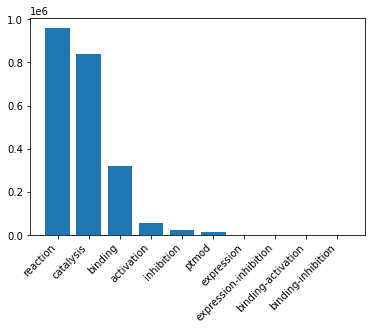

In [72]:
dfTypeR_pre = preprocessingV2(dfTypeR)
link_count = dfTypeR_pre['Link'].value_counts()
indexNamesArr = link_count.index.values
fig, ax = plt.subplots()
plt.bar(indexNamesArr, link_count)
plt.xticks(rotation = 45, ha="right")
plt.show()

In [73]:
to_despreciate = ("ptmod","expression")
dfTypeR_pre = dfTypeR_pre[~dfTypeR_pre['Link'].isin(to_despreciate)]
dfTypeR_pre['Link'] = dfTypeR_pre['Link'].replace(['activation',
                                                   "inhibition",
                                                   "expression-inhibition"],
                                                   'regulation').replace(['binding-activation',
                                                                          'binding-inhibition'],
                                                                          'binding')

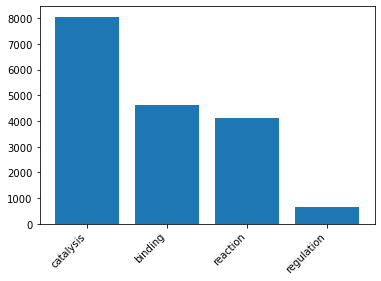

In [74]:
# Combine the pandas obj by the columns Source, Target and Type.
result = pd.merge( dfTypeR_pre,dfSf,
                  on=["Source","Target","Type"],
                  how="inner")
# Remove the row duplicates.
result['Type'] = result["Type"].map({"Directed":1,"Undirected":0})
result = result.drop_duplicates()
link_count = result['Link'].value_counts()
indexNamesArr = link_count.index.values
fig, ax = plt.subplots()
plt.bar(indexNamesArr, link_count)
plt.xticks(rotation = 45, ha="right")
plt.show()

In [75]:
binaryTables = {}
for x in result['Link'].value_counts().index.values:
    print(x)
    binaryTables[x] = transformBinaryLinkTable(x,result)

catalysis
binding
reaction
regulation


<AxesSubplot:>

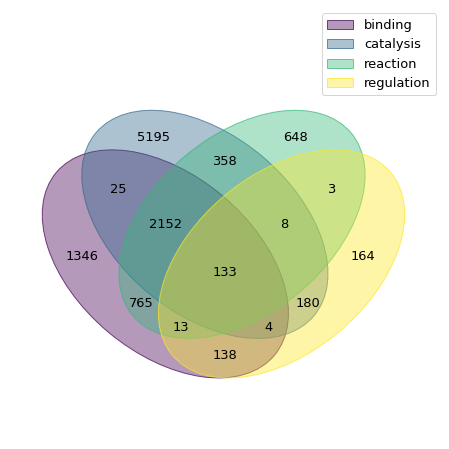

In [76]:
interaction= result['Source'].str.cat(result['Target'],sep="-")
ij=pd.DataFrame([interaction, result["Link"]]).T.drop_duplicates()
res = ij.groupby('Link')["Source"].apply(' '.join).reset_index()
dict1 = dict()
for row in res.iterrows():
    dict1[res.Link[row[0]]] = set(res.Source[row[0]].split())
venn(dict1)

## NAs evaluation

In [77]:
print(result.count())

Source                 17416
Target                 17416
Link                   17416
Type                   17416
Score                  17416
ARACNE_score            1094
CLR_score              17415
ELNET_score            15705
GENIE3_score           17416
LLR_score              17358
MI_score               17416
NARROMI_score          14887
PCOR_score             17416
PEARSON_score          17416
TOMSimilarity_score    17416
PLSNET_score           17416
SPEARMAN_score         17416
TIGRESS_score           5869
irp_score              17416
dtype: int64


In [78]:
del result["ARACNE_score"]

In [79]:
X = result.iloc[:,3:]
y = result['Link']
imputer = KNNImputer(n_neighbors=7, weights="uniform")
X_imputed=imputer.fit_transform(X)

In [80]:
X_imputed_abs = pd.DataFrame(X_imputed).abs()
X_imputed_abs.columns = X.columns
print(X_imputed_abs.count())

Type                   17416
Score                  17416
CLR_score              17416
ELNET_score            17416
GENIE3_score           17416
LLR_score              17416
MI_score               17416
NARROMI_score          17416
PCOR_score             17416
PEARSON_score          17416
TOMSimilarity_score    17416
PLSNET_score           17416
SPEARMAN_score         17416
TIGRESS_score          17416
irp_score              17416
dtype: int64


## MinMax scaler

In [81]:
scaler = MinMaxScaler()
X_ia_scaled = scaler.fit(X_imputed_abs).transform(X_imputed_abs)
X_ia_scaled = pd.DataFrame(X_ia_scaled)
X_ia_scaled.columns = X_imputed_abs.columns
print(X_ia_scaled)

       Type     Score  CLR_score  ELNET_score  GENIE3_score  LLR_score  \
0       0.0  0.891381   0.182408     0.634058      0.007034   0.902655   
1       1.0  0.093270   0.153364     0.103261      0.012303   0.853097   
2       0.0  0.511216   0.104923     0.085145      0.011892   0.380531   
3       1.0  0.433294   0.257742     0.855072      0.029843   0.886726   
4       0.0  0.889020   0.205640     0.806159      0.056551   0.477876   
...     ...       ...        ...          ...           ...        ...   
17411   1.0  0.682409   0.226718     0.003623      0.013661   0.256637   
17412   1.0  0.465171   0.179210     0.001812      0.032109   0.867257   
17413   1.0  0.192444   0.186172     0.014493      0.003615   0.304425   
17414   1.0  0.463991   0.181123     0.491460      0.013413   0.454867   
17415   1.0  0.675325   0.158612     0.236542      0.014327   0.610619   

       MI_score  NARROMI_score  PCOR_score  PEARSON_score  \
0      0.119899       0.094685    0.019846       0

## PCA

In [82]:
X = X_ia_scaled
tn = ['binding','catalysis' ,'reaction', 'regulation']
y = result['Link'].reset_index(drop=True)

### Cumulative explained variance

Text(0, 0.5, 'cumulative explained variance')

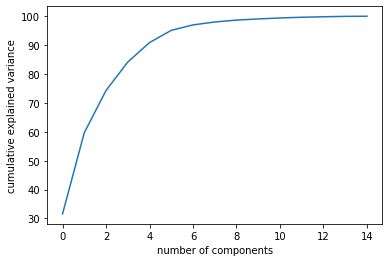

In [83]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Plot PCAs

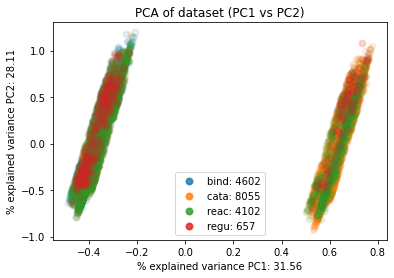

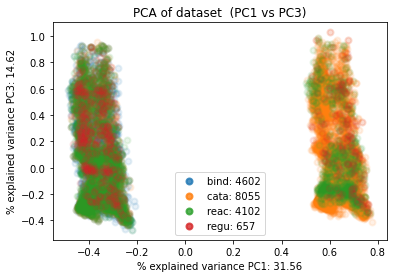

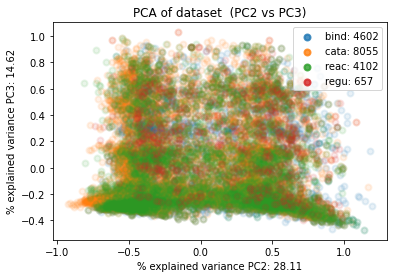

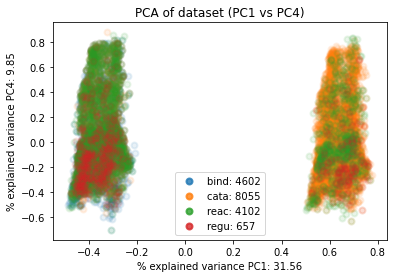

In [84]:
pca = PCA(n_components=4, random_state=42)
X_r = pca.fit_transform(X)
plt.figure()
colors = sns.color_palette()
lw = 2
plt.title('PCA of dataset (PC1 vs PC2)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC1: "+str(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("% explained variance PC2: "+str(round(pca.explained_variance_ratio_[1]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

plt.title('PCA of dataset  (PC1 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC1: "+str(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("% explained variance PC3: "+str(round(pca.explained_variance_ratio_[2]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

plt.title('PCA of dataset  (PC2 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 1], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC2: "+str(round(pca.explained_variance_ratio_[1]*100,2)))
plt.ylabel("% explained variance PC3: "+str(round(pca.explained_variance_ratio_[2]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

plt.title('PCA of dataset (PC1 vs PC4)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 3], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC1: "+str(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("% explained variance PC4: "+str(round(pca.explained_variance_ratio_[3]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

### Feature importances

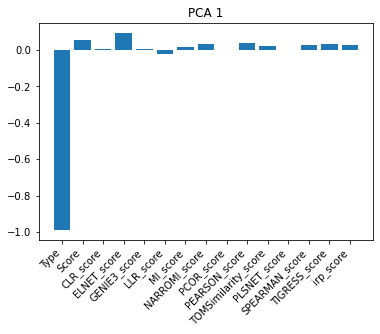

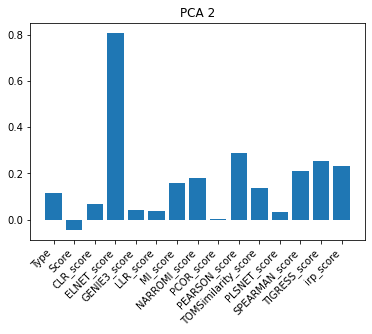

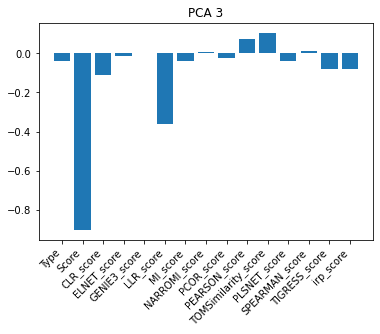

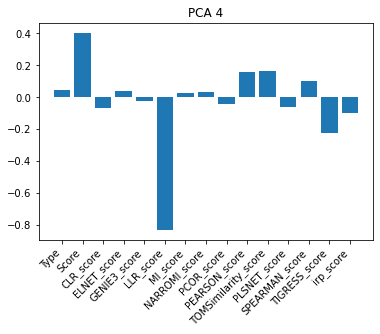

In [85]:
i = 1
for com in pca.components_:
    plt.bar(X.columns,com)
    plt.title("PCA " + str(i)) 
    plt.xticks(rotation = 45, ha="right")
    plt.show()
    i+=1

## TSNE 

In [86]:
tsne= TSNE(n_components=3,init='pca',
                         random_state=42,
                         n_iter = 500 )
X_r = tsne.fit_transform(X)

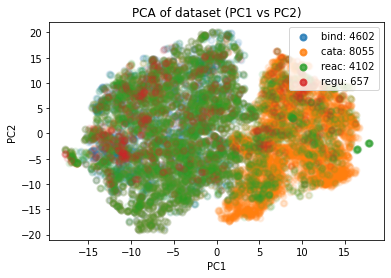

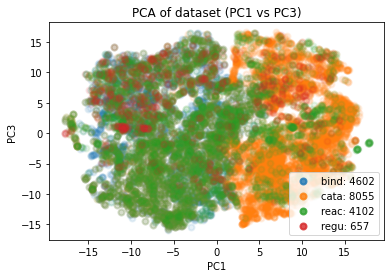

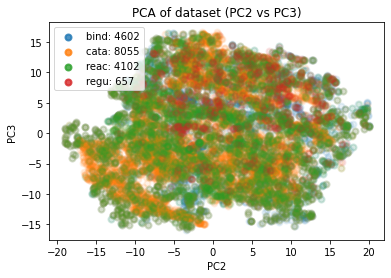

In [87]:
plt.figure()
colors = sns.color_palette()
lw = 2
plt.title('PCA of dataset (PC1 vs PC2)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("PC1")
plt.ylabel("PC2")
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()
plt.title('PCA of dataset (PC1 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("PC1")
plt.ylabel("PC3")
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()
plt.title('PCA of dataset (PC2 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 1], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("PC2")
plt.ylabel("PC3")
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

## Export

In [88]:
pd.concat([y, X_ia_scaled], axis=1).to_csv("results/"+org+".processed_data.tsv",
                               sep='\t',
                               index=False)

# *Saccharomyces cerevisiae* analysis

In [89]:
org = "scere"
# Reading the preprocess link data.
dfTypeR = pd.read_csv(org+".protein.actions.v11.0.txt.gz",
                      sep="\t",
                      compression="gzip",
                      keep_default_na=True)
# Reading the Seidr file converted in tsv.
dfSf    = pd.read_csv(org+"-network.txt",
                      sep='[;\t]',
                      engine='python',
                      keep_default_na=False,
                      na_values='nan')

In [90]:
# Automatic selection of the colons from Seidr.
selected_col = []
for c in dfSf.columns:
    if "Source" in c or "Target" in c  or "Type" in c or "score" in c :
        selected_col.append(c)
dfSf = dfSf[selected_col]

In [91]:
print("-----------string-action file-----------")
dfTypeR.head()

-----------string-action file-----------


item_id_a   item_id_b     mode action is_directional a_is_acting  score
0  4932.Q0045  4932.Q0050  binding    NaN              f           f    900
1  4932.Q0045  4932.Q0060  binding    NaN              f           f    540
2  4932.Q0045  4932.Q0065  binding    NaN              f           f    540
3  4932.Q0045  4932.Q0070  binding    NaN              f           f    540
4  4932.Q0045  4932.Q0105  binding    NaN              f           f    804

In [92]:
print("-----------seidr file-----------")
dfSf.head()

-----------seidr file-----------


Source Target      Type  ARACNE_score  CLR_score  ELNET_score  GENIE3_score  \
0  Q0010  Q0017  Directed           NaN    5.42318        0.505      1.368760   
1  Q0010  Q0032  Directed           NaN    4.45347        0.170      0.450503   
2  Q0017  Q0032  Directed           NaN    6.08534        0.519      0.376180   
3  Q0050  Q0045  Directed           NaN    7.70583        0.013     23.511100   
4  Q0055  Q0017  Directed           NaN    1.00634        0.315      6.658460   

   LLR_score  MI_score  NARROMI_score  PCOR_score  PEARSON_score  \
0        NaN  0.566362       0.588701    0.006476       0.663444   
1        NaN  0.514074            NaN    0.004267       0.507050   
2        NaN  0.667295       0.255137    0.002028       0.826293   
3      0.436  0.670055       0.154917    0.085100       0.543264   
4        NaN  0.313977       0.077280    0.014122       0.520888   

   TOMSimilarity_score  PLSNET_score  SPEARMAN_score  TIGRESS_score  irp_score  
0             0.054633      0.024112        0.835139        0.97990   0.440090  
1             0.059810      0.023509        0.797037        0.00050   0.273614  
2             0.096329      0.016372        0.894470        0.00655   0.412529  
3             0.084719      0.023748        0.330754            NaN   0.411890  
4             0.054927      0.018800        0.317671        0.00370   0.255151

preprocessing
exporting
Done.


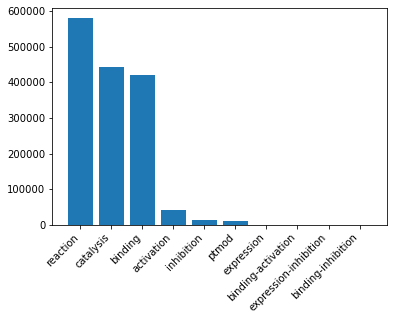

In [93]:
dfTypeR_pre = preprocessing(dfTypeR)
link_count = dfTypeR_pre['Link'].value_counts()
indexNamesArr = link_count.index.values
fig, ax = plt.subplots()
plt.bar(indexNamesArr, link_count)
plt.xticks(rotation = 45, ha="right")
plt.show()

In [94]:
to_despreciate = ("ptmod","expression")
dfTypeR_pre = dfTypeR_pre[~dfTypeR_pre['Link'].isin(to_despreciate)]
dfTypeR_pre['Link'] = dfTypeR_pre['Link'].replace(['activation',
                                                   "inhibition",
                                                   "expression-inhibition"],
                                                   'regulation').replace(['binding-activation',
                                                                          'binding-inhibition'],
                                                                          'binding')

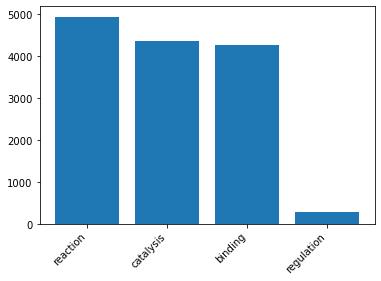

In [95]:
# Combine the pandas obj by the columns Source, Target and Type.
result = pd.merge( dfTypeR_pre,dfSf,
                  on=["Source","Target","Type"],
                  how="inner")
# Remove the row duplicates.
result['Type'] = result["Type"].map({"Directed":1,"Undirected":0})
result = result.drop_duplicates()
link_count = result['Link'].value_counts()
indexNamesArr = link_count.index.values
fig, ax = plt.subplots()
plt.bar(indexNamesArr, link_count)
plt.xticks(rotation = 45, ha="right")
plt.show()

In [96]:
binaryTables = {}
for x in result['Link'].value_counts().index.values:
    print(x)
    binaryTables[x] = transformBinaryLinkTable(x,result)

reaction
catalysis
binding
regulation


<AxesSubplot:>

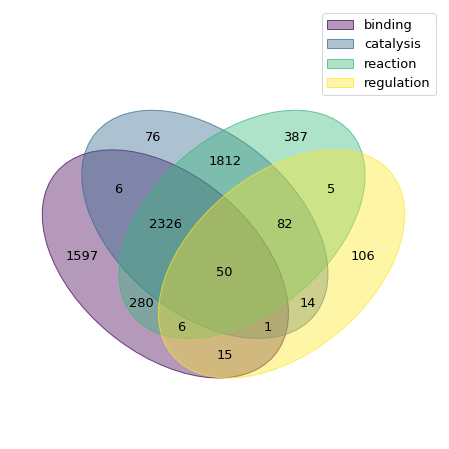

In [97]:
interaction= result['Source'].str.cat(result['Target'],sep="-")
ij=pd.DataFrame([interaction, result["Link"]]).T.drop_duplicates()
res = ij.groupby('Link')["Source"].apply(' '.join).reset_index()
dict1 = dict()
for row in res.iterrows():
    dict1[res.Link[row[0]]] = set(res.Source[row[0]].split())
venn(dict1)

## NAs evaluation

In [98]:
print(result.count())

Source                 13877
Target                 13877
Link                   13877
Type                   13877
Score                  13877
ARACNE_score             884
CLR_score              13849
ELNET_score            13873
GENIE3_score           13877
LLR_score               4436
MI_score               13877
NARROMI_score           9812
PCOR_score             13877
PEARSON_score          13877
TOMSimilarity_score    13877
PLSNET_score           13877
SPEARMAN_score         13877
TIGRESS_score           7251
irp_score              13877
dtype: int64


In [99]:
del result["ARACNE_score"]
del result["LLR_score"]

In [100]:
X = result.iloc[:,3:]
y = result['Link']
imputer = KNNImputer(n_neighbors=7, weights="uniform")
X_imputed=imputer.fit_transform(X)

In [101]:
X_imputed_abs = pd.DataFrame(X_imputed).abs()
X_imputed_abs.columns = X.columns
print(X_imputed_abs.count())

Type                   13877
Score                  13877
CLR_score              13877
ELNET_score            13877
GENIE3_score           13877
MI_score               13877
NARROMI_score          13877
PCOR_score             13877
PEARSON_score          13877
TOMSimilarity_score    13877
PLSNET_score           13877
SPEARMAN_score         13877
TIGRESS_score          13877
irp_score              13877
dtype: int64


## MinMax scaler

In [102]:
scaler = MinMaxScaler()
X_ia_scaled = scaler.fit(X_imputed_abs).transform(X_imputed_abs)
X_ia_scaled = pd.DataFrame(X_ia_scaled)
X_ia_scaled.columns = X_imputed_abs.columns
print(X_ia_scaled)

       Type     Score  CLR_score  ELNET_score  GENIE3_score  MI_score  \
0       0.0  0.459906   0.416457     0.732143      0.081074  0.308769   
1       0.0  0.459906   0.594422     0.969643      0.239803  0.424727   
2       0.0  0.771226   0.466846     0.891071      0.332114  0.346979   
3       0.0  0.214623   0.329407     0.132143      0.209247  0.281201   
4       0.0  0.214623   0.309281     0.723214      0.201753  0.309069   
...     ...       ...        ...          ...           ...       ...   
13872   0.0  0.770047   0.337940     0.039286      0.076254  0.319452   
13873   1.0  0.362028   0.627795     0.907143      0.138871  0.799344   
13874   1.0  0.362028   0.627795     0.907143      0.138871  0.799344   
13875   0.0  0.976415   0.521855     0.878571      0.608693  0.635716   
13876   0.0  0.824292   0.521855     0.878571      0.608693  0.635716   

       NARROMI_score  PCOR_score  PEARSON_score  TOMSimilarity_score  \
0           0.131183    0.063508       0.727370    

## PCA

In [103]:
X = X_ia_scaled
tn = ['binding','catalysis' ,'reaction', 'regulation']
y = result['Link'].reset_index(drop=True)

### Cumulative explained variance

Text(0, 0.5, 'cumulative explained variance')

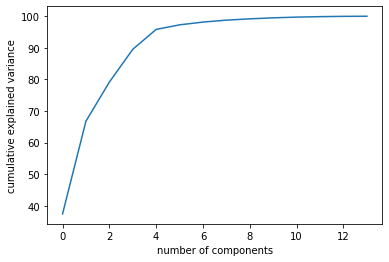

In [104]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Plot PCAs

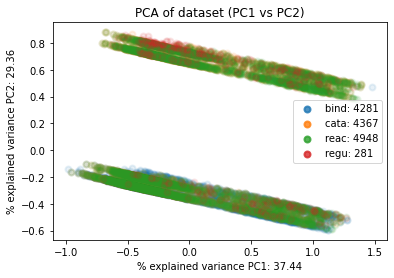

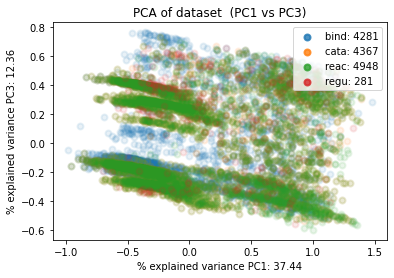

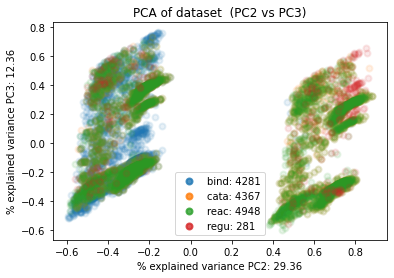

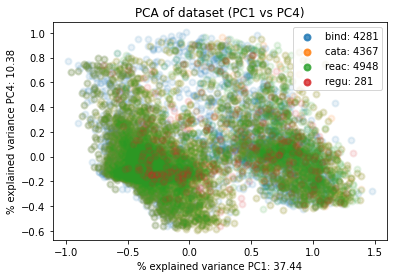

In [105]:
pca = PCA(n_components=4, random_state=42)
X_r = pca.fit_transform(X)
plt.figure()
colors = sns.color_palette()
lw = 2
plt.title('PCA of dataset (PC1 vs PC2)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC1: "+str(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("% explained variance PC2: "+str(round(pca.explained_variance_ratio_[1]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

plt.title('PCA of dataset  (PC1 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC1: "+str(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("% explained variance PC3: "+str(round(pca.explained_variance_ratio_[2]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

plt.title('PCA of dataset  (PC2 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 1], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC2: "+str(round(pca.explained_variance_ratio_[1]*100,2)))
plt.ylabel("% explained variance PC3: "+str(round(pca.explained_variance_ratio_[2]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

plt.title('PCA of dataset (PC1 vs PC4)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 3], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("% explained variance PC1: "+str(round(pca.explained_variance_ratio_[0]*100,2)))
plt.ylabel("% explained variance PC4: "+str(round(pca.explained_variance_ratio_[3]*100,2)))
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

### Feature importances

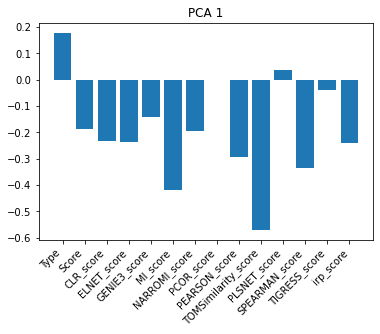

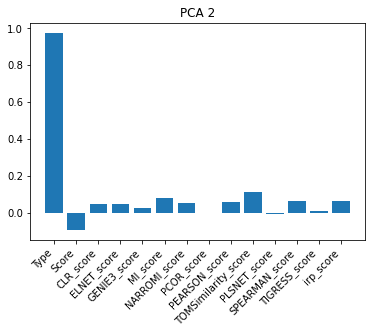

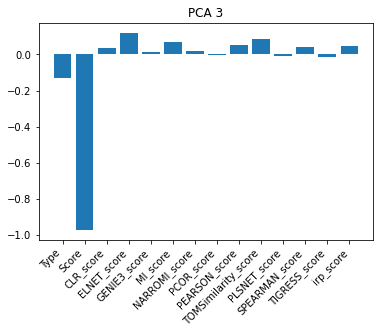

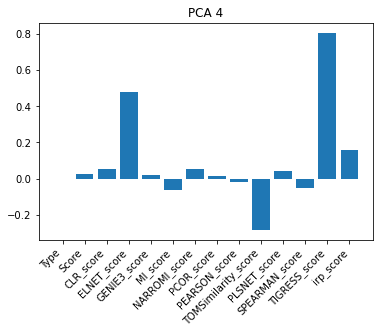

In [106]:
i = 1
for com in pca.components_:
    plt.bar(X.columns,com)
    plt.title("PCA " + str(i)) 
    plt.xticks(rotation = 45, ha="right")
    plt.show()
    i+=1

## TSNE 

In [107]:
tsne= TSNE(n_components=3,init='pca',
                         random_state=42,
                         n_iter = 500 )
X_r = tsne.fit_transform(X)

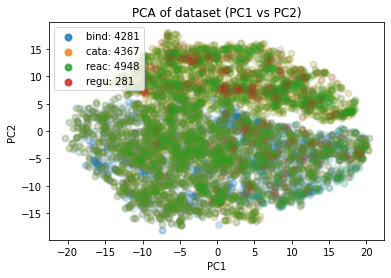

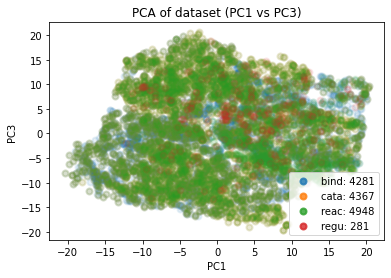

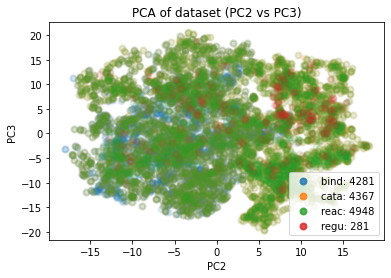

In [108]:
plt.figure()
colors = sns.color_palette()
lw = 2
plt.title('PCA of dataset (PC1 vs PC2)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("PC1")
plt.ylabel("PC2")
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()
plt.title('PCA of dataset (PC1 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("PC1")
plt.ylabel("PC3")
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()
plt.title('PCA of dataset (PC2 vs PC3)')
for color, i in zip(colors, tn):
    plt.scatter(X_r[y == i, 1], X_r[y == i, 2], color=color, alpha=.1, lw=lw,
                label=i[:4]+": "+str(result["Link"].value_counts()[i]))
plt.xlabel("PC2")
plt.ylabel("PC3")
leg = plt.legend(loc="best", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)
plt.show()

## Export

In [109]:
pd.concat([y, X_ia_scaled], axis=1).to_csv("results/"+org+".processed_data.tsv",
                               sep='\t',
                               index=False)